In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
#from sqlalchemy import create_engine
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
#import datetime
#datetime.datetime.strptime

In [2]:
#read in tweets as DataFrame
tweets="tweets.csv"
tweets_df = pd.read_csv(tweets, parse_dates=["time"])

# Drop Colums 
final_df = tweets_df.drop(columns = ["id","in_reply_to_status_id","in_reply_to_user_id","place_id","place_full_name", "place_name", "place_type", "place_country_code", "place_country", "place_contained_within", "place_attributes", "place_bounding_box", "truncated", "entities", "extended_entities", "longitude", "latitude"])
final_df

# Rename the columns
final_df.columns=["TweetBy", "text", "Is_a_Retweet", "Orginal Author", "Time", "Reply to Tweet - Name", "Quote Status", "Language", "RetweetCount", "FavoriteCount", "Source"]
final_df.head()

final_df.head()

,TweetBy,text,Is_a_Retweet,Orginal Author,Time,Reply to Tweet - Name,Quote Status,Language,RetweetCount,FavoriteCount,Source
0,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28 00:22:34,NaN,False,en,218,651,https://studio.twitter.com
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27 23:45:00,NaN,False,en,2445,5308,http://twitter.com
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27 23:26:40,NaN,False,en,7834,27234,https://about.twitter.com/products/tweetdeck
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27 23:08:41,NaN,False,en,916,2542,https://studio.twitter.com
4,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27 22:30:27,NaN,False,en,859,2882,https://about.twitter.com/products/tweetdeck


In [3]:
final_df.dtypes

TweetBy                          object
text                             object
Is_a_Retweet                       bool
Orginal Author                   object
Time                     datetime64[ns]
Reply to Tweet - Name            object
Quote Status                       bool
Language                         object
RetweetCount                      int64
FavoriteCount                     int64
Source                           object
dtype: object

In [4]:
# how many nulls
final_df.isnull().sum()

TweetBy                     0
text                        0
Is_a_Retweet                0
Orginal Author           5722
Time                        0
Reply to Tweet - Name    6236
Quote Status                0
Language                    0
RetweetCount                0
FavoriteCount               0
Source                      0
dtype: int64

In [5]:
#how many total tweets?
final_df.count()



#post2017USAmoviesdropped = USApost2017.dropna(subset=['country'], how='any')

TweetBy                  6444
text                     6444
Is_a_Retweet             6444
Orginal Author            722
Time                     6444
Reply to Tweet - Name     208
Quote Status             6444
Language                 6444
RetweetCount             6444
FavoriteCount            6444
Source                   6444
dtype: int64

In [6]:
#check how many tweets by each
groupedhandle=final_df.groupby('TweetBy')

groupedhandle.count()


,text,Is_a_Retweet,Orginal Author,Time,Reply to Tweet - Name,Quote Status,Language,RetweetCount,FavoriteCount,Source
TweetBy,,,,,,,,,,
HillaryClinton,3226,3226,597,3226,203,3226,3226,3226,3226,3226
realDonaldTrump,3218,3218,125,3218,5,3218,3218,3218,3218,3218


In [7]:
#drop rows that are is_retweet= True to keep original tweets

#x=tweets_df[tweets_df['is_retweet'].str.contains('False', regex=False, na=False)]

final_df = final_df.drop(final_df.loc[final_df.Is_a_Retweet==True].index)

final_df.head()

,TweetBy,text,Is_a_Retweet,Orginal Author,Time,Reply to Tweet - Name,Quote Status,Language,RetweetCount,FavoriteCount,Source
0,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28 00:22:34,NaN,False,en,218,651,https://studio.twitter.com
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27 23:08:41,NaN,False,en,916,2542,https://studio.twitter.com
4,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27 22:30:27,NaN,False,en,859,2882,https://about.twitter.com/products/tweetdeck
5,realDonaldTrump,Join me for a 3pm rally - tomorrow at the Mid-...,False,NaN,2016-09-27 22:13:24,NaN,False,en,2181,6172,http://twitter.com/download/iphone
6,HillaryClinton,This election is too important to sit out. Go ...,False,NaN,2016-09-27 21:35:28,NaN,False,en,1303,2849,https://about.twitter.com/products/tweetdeck


In [8]:
#see count
groupedhandle=final_df.groupby('TweetBy')

groupedhandle.count()

,text,Is_a_Retweet,Orginal Author,Time,Reply to Tweet - Name,Quote Status,Language,RetweetCount,FavoriteCount,Source
TweetBy,,,,,,,,,,
HillaryClinton,2629,2629,0,2629,203,2629,2629,2629,2629,2629
realDonaldTrump,3093,3093,0,3093,5,3093,3093,3093,3093,3093


In [9]:
#drop rows with Spanish tweets
final_df = final_df.drop(final_df[final_df.Language=='es'].index)

In [10]:
#clean up punctuation from text

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from textblob import TextBlob
# import re


# def form_sentence(tweet):
#     tweet_blob = TextBlob(tweet)
#     return ' '.join(tweet_blob.words)

#x= form_sentence(tweets_df['text'])
#print(tweets_df['text'].iloc[10])

#tweets_df.text = tweets_df.text.astype('str')
#tweets_df.dtypes
#form_sentence(tweets_df['text'].iloc[:5722])



In [11]:
final_df["text"]

0       The question in this election: Who can put the...
3       If we stand together, there's nothing we can't...
4       Both candidates were asked about how they'd co...
5       Join me for a 3pm rally - tomorrow at the Mid-...
6       This election is too important to sit out. Go ...
                              ...                        
6439    "@lilredfrmkokomo: @realDonaldTrump My Faceboo...
6440    "@marybnall01: @realDonaldTrump watched lowell...
6441    "@ghosthunter_lol: Iowa key endorsement for @r...
6442    "@iLoveiDevices: @EdwinRo47796972 @happyjack22...
6443    "@SalRiccobono: @realDonaldTrump @troyconway D...
Name: text, Length: 5648, dtype: object

In [12]:
# remove all https:// and http:// urls
final_df['text'] = final_df["text"].str.replace(r"(https?://[^\s]+)", "" ,regex=True)

# remove all punctuation EXCEPT FOR !
final_df['text'] = final_df['text'].str.replace(r'[^\w\s!]+', '')
final_df['text']

0       The question in this election Who can put the ...
3       If we stand together theres nothing we cant do...
4       Both candidates were asked about how theyd con...
5       Join me for a 3pm rally  tomorrow at the MidAm...
6       This election is too important to sit out Go t...
                              ...                        
6439    lilredfrmkokomo realDonaldTrump My Facebook Gr...
6440    marybnall01 realDonaldTrump watched lowell mas...
6441    ghosthunter_lol Iowa key endorsement for realD...
6442    iLoveiDevices EdwinRo47796972 happyjack225 Fox...
6443    SalRiccobono realDonaldTrump troyconway Donald...
Name: text, Length: 5648, dtype: object

In [13]:
# se row index as DateTime Index
final_df = final_df.set_index("Time")
# tweets_df.index = tweets_df["time"]
final_df

,TweetBy,text,Is_a_Retweet,Orginal Author,Reply to Tweet - Name,Quote Status,Language,RetweetCount,FavoriteCount,Source
Time,,,,,,,,,,
2016-09-28 00:22:34,HillaryClinton,The question in this election Who can put the ...,False,NaN,NaN,False,en,218,651,https://studio.twitter.com
2016-09-27 23:08:41,HillaryClinton,If we stand together theres nothing we cant do...,False,NaN,NaN,False,en,916,2542,https://studio.twitter.com
2016-09-27 22:30:27,HillaryClinton,Both candidates were asked about how theyd con...,False,NaN,NaN,False,en,859,2882,https://about.twitter.com/products/tweetdeck
2016-09-27 22:13:24,realDonaldTrump,Join me for a 3pm rally tomorrow at the MidAm...,False,NaN,NaN,False,en,2181,6172,http://twitter.com/download/iphone
2016-09-27 21:35:28,HillaryClinton,This election is too important to sit out Go t...,False,NaN,NaN,False,en,1303,2849,https://about.twitter.com/products/tweetdeck
...,...,...,...,...,...,...,...,...,...,...
2016-01-05 03:47:14,realDonaldTrump,lilredfrmkokomo realDonaldTrump My Facebook Gr...,False,NaN,NaN,False,en,1110,4024,http://twitter.com/download/android
2016-01-05 03:44:17,realDonaldTrump,marybnall01 realDonaldTrump watched lowell mas...,False,NaN,NaN,False,en,855,3181,http://twitter.com/download/android
2016-01-05 03:42:10,realDonaldTrump,ghosthunter_lol Iowa key endorsement for realD...,False,NaN,NaN,False,en,2315,5992,http://twitter.com/download/android


In [14]:
final_df['Source'].unique()

array(['https://studio.twitter.com',
       'https://about.twitter.com/products/tweetdeck',
       'http://twitter.com/download/iphone',
       'http://twitter.com/download/android', 'http://twitter.com',
       'http://twitter.com/#!/download/ipad', 'http://instagram.com',
       'https://mobile.twitter.com'], dtype=object)

In [15]:
len(final_df.index)

5648

In [16]:
final_df.describe()

,RetweetCount,FavoriteCount
count,5648.000000,5648.000000
mean,4633.937854,12462.341891
std,8504.592213,15304.904900
min,169.000000,274.000000
25%,1639.750000,4531.750000
50%,3087.500000,8519.000000
75%,5715.250000,16232.750000
max,490180.000000,660384.000000


In [17]:
df1 = final_df.loc[:,['TweetBy','text','RetweetCount','Is_a_Retweet','Language','Source']].sort_values('RetweetCount',ascending=True)
df1.reset_index(inplace=True)

df1.head()

#df1['year'] = [Time[:4] for Time in df1['Time']]
#df1.head()

,Time,TweetBy,text,RetweetCount,Is_a_Retweet,Language,Source
0,2016-05-23 16:59:42,HillaryClinton,MaryKayHenry Nobody knows better than unions t...,169,False,en,https://about.twitter.com/products/tweetdeck
1,2016-09-28 00:22:34,HillaryClinton,The question in this election Who can put the ...,218,False,en,https://studio.twitter.com
2,2016-04-27 01:13:11,HillaryClinton,Watch live Hillary speaks on tonights primary ...,289,False,en,https://about.twitter.com/products/tweetdeck
3,2016-05-23 17:49:56,HillaryClinton,Tune in to watch Hillary address the 2016 SEIU...,349,False,en,https://about.twitter.com/products/tweetdeck
4,2016-07-25 15:35:05,HillaryClinton,Hillarys speaking at the VFWHQ Tune in now,355,False,en,https://about.twitter.com/products/tweetdeck


In [18]:
df1.dtypes

Time            datetime64[ns]
TweetBy                 object
text                    object
RetweetCount             int64
Is_a_Retweet              bool
Language                object
Source                  object
dtype: object

In [19]:
df1["Time"]=pd.to_datetime(df1["Time"])

In [20]:
df1.dtypes

Time            datetime64[ns]
TweetBy                 object
text                    object
RetweetCount             int64
Is_a_Retweet              bool
Language                object
Source                  object
dtype: object

In [21]:
df1['Year']=df1['Time'].dt.year
df1['Month']=df1['Time'].dt.month
df1['date']=df1['Time'].dt.date
df1['Hour']=df1['Time'].dt.time
df1

,Time,TweetBy,text,RetweetCount,Is_a_Retweet,Language,Source,Year,Month,date,Hour
0,2016-05-23 16:59:42,HillaryClinton,MaryKayHenry Nobody knows better than unions t...,169,False,en,https://about.twitter.com/products/tweetdeck,2016,5,2016-05-23,16:59:42
1,2016-09-28 00:22:34,HillaryClinton,The question in this election Who can put the ...,218,False,en,https://studio.twitter.com,2016,9,2016-09-28,00:22:34
2,2016-04-27 01:13:11,HillaryClinton,Watch live Hillary speaks on tonights primary ...,289,False,en,https://about.twitter.com/products/tweetdeck,2016,4,2016-04-27,01:13:11
3,2016-05-23 17:49:56,HillaryClinton,Tune in to watch Hillary address the 2016 SEIU...,349,False,en,https://about.twitter.com/products/tweetdeck,2016,5,2016-05-23,17:49:56
4,2016-07-25 15:35:05,HillaryClinton,Hillarys speaking at the VFWHQ Tune in now,355,False,en,https://about.twitter.com/products/tweetdeck,2016,7,2016-07-25,15:35:05
...,...,...,...,...,...,...,...,...,...,...,...
5643,2016-05-05 18:57:30,realDonaldTrump,Happy CincoDeMayo! The best taco bowls are mad...,82653,False,en,http://twitter.com/download/iphone,2016,5,2016-05-05,18:57:30
5644,2016-09-27 01:19:47,HillaryClinton,I never said that Donald Trump who said that d...,91670,False,en,https://about.twitter.com/products/tweetdeck,2016,9,2016-09-27,01:19:47
5645,2016-07-20 15:36:06,realDonaldTrump,The media is spending more time doing a forens...,120817,False,en,http://twitter.com,2016,7,2016-07-20,15:36:06
5646,2016-06-09 20:40:32,realDonaldTrump,How long did it take your staff of 823 people ...,167274,False,en,http://twitter.com/download/iphone,2016,6,2016-06-09,20:40:32


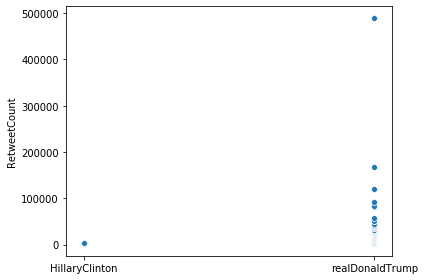

In [52]:
# Scatter Plot 

sns.scatterplot(x=sorted(df1.TweetBy), y=df1.RetweetCount)
plt.savefig('Graph4.png')
plt.tight_layout()
plt.savefig('myfile.png', bbox_inches = "tight")

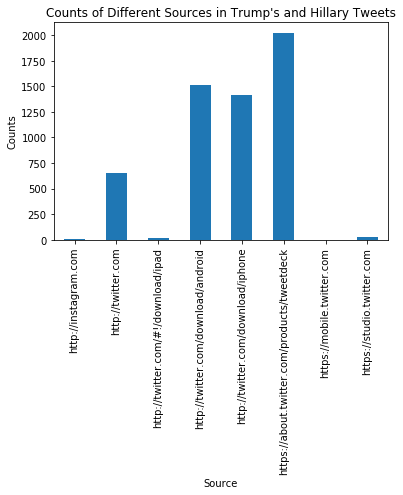

In [56]:
num_sources = len(df1)

# make a bar plot here
countsources = df1.groupby('Source').size()
count_sourcegraph = countsources.plot(kind='bar', title="Counts of Different Sources in Trump's and Hillary Tweets")
count_sourcegraph.set_ylabel('Counts')
count_sourcegraph.set_xlabel('Source')
plt.savefig('Graph3.png')
#plt.tight_layout()
plt.savefig('myfile3.png', bbox_inches = "tight")

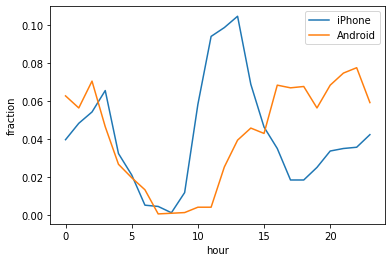

In [32]:
getandroid = df1.loc[df1['Source'] == 'http://twitter.com/download/iphone']
getiphone = df1.loc[df1['Source'] == 'http://twitter.com/download/android']

num_android = getandroid['Time'].dt.hour.value_counts(normalize = True)
num_iphone = getiphone['Time'].dt.hour.value_counts(normalize = True)
plt.plot(num_iphone.sort_index())
plt.plot(num_android.sort_index())
plt.ylabel('fraction')
plt.xlabel('hour')
plt.legend(['iPhone', 'Android'])
plt.savefig('test.pdf')
plt.savefig('Graph1.png')
plt.savefig('Graph2.png')
plt.savefig('myfile2.png', bbox_inches = "tight")

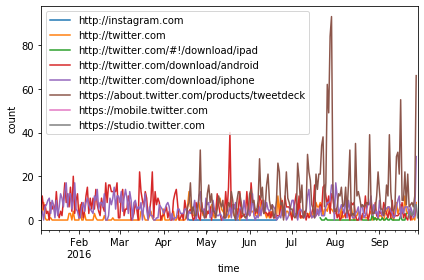

In [53]:
#fig=plt.figure(figsize=(30,30))

(df1.loc[:, ['Time', 'Source']]
 .set_index('Time')
 .groupby('Source')
 .resample('D')
 .size()
 .unstack(level=0)
 .plot()
)
plt.xlabel('time')
plt.ylabel('count')
plt.legend(loc = 'upper left')
plt.tight_layout()

#plt.figure(figsize=(100,100))
plt.savefig('Graph2.png')
plt.savefig('myfile2.png', bbox_inches = "tight")

In [ ]:
#sns.lmplot(data=df1, x='date', y='RetweetCount')

In [44]:
# Tweets 
tweetsby = df1[['Source', 'Year', 'text']].pivot_table(
    index='Year', columns=['text'], aggfunc='count')
#tweetsby.to_csv('output/test.csv')
tweetsby.iloc[::-1].plot(kind='barh', stacked=True)
plt.legend(loc = 'best')

#plt.legend(loc = 'lower right')
#fig=plt.figure(figsize=(1,5))


ValueError: Image size of 915x105175 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

AttributeError: 'datetime.date' object has no attribute 'conjugate'

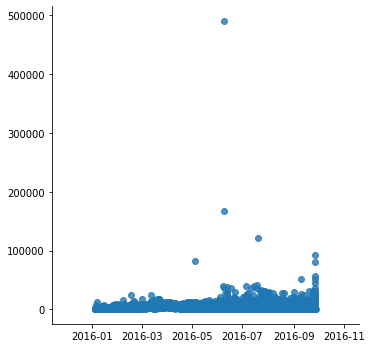

In [27]:
sns.lmplot(data=df1, x='date', y='RetweetCount')

In [ ]:
from collections import Counter
import nltk
import string
nltk.download('stopwords')

In [ ]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('en')
stopwords = stopwords + ['rt']

# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

# replace '|'-->' ' and drop all stopwords
words = (final_df.text
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
words_data = final_df(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')

final_df.set_option('display.max_rows', top_N)
words_data = words_data.reset_index()
words_data['Word Encoded'] = words_data['Word'].apply(encodeText)
words_data.drop('Word', axis=1).to_csv('word-frequencies.csv')
words_data.head(top_N)


In [ ]:
tweets_df.columns

In [ ]:
# turn column into DateTime
# tweets_df["time"] = pd.to_datetime(tweets_df["time"])
# tweets_df.dtypes

In [ ]:
tweets_df["time"]

In [ ]:
type("""{"cheese":"life"}""")

In [ ]:
type(eval("""{"cheese":"life"}"""))

In [ ]:
tweets_df

In [ ]:
tweets_df['text'] = tweets_df['text'].str.replace(r'[^\w\s!]+', '')  

In [ ]:
tweets_df.to_csv('file_name.csv')

In [ ]:
tweets_df.head()

httpswwwgooglecom